In [1]:
import requests as req,os
URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

import cmath #, sympy 
from sympy import Symbol, atan, pi, tan, sqrt, solve, log
from numpy.polynomial import Polynomial
from numpy import inf

from control.matlab import tf, rlocus, step, feedback, lsim, bode
from control import pade

from control_materials import *

Running Python: 3.12.6
Running Sympy: 1.13.2
Control Package Found
Basic file found


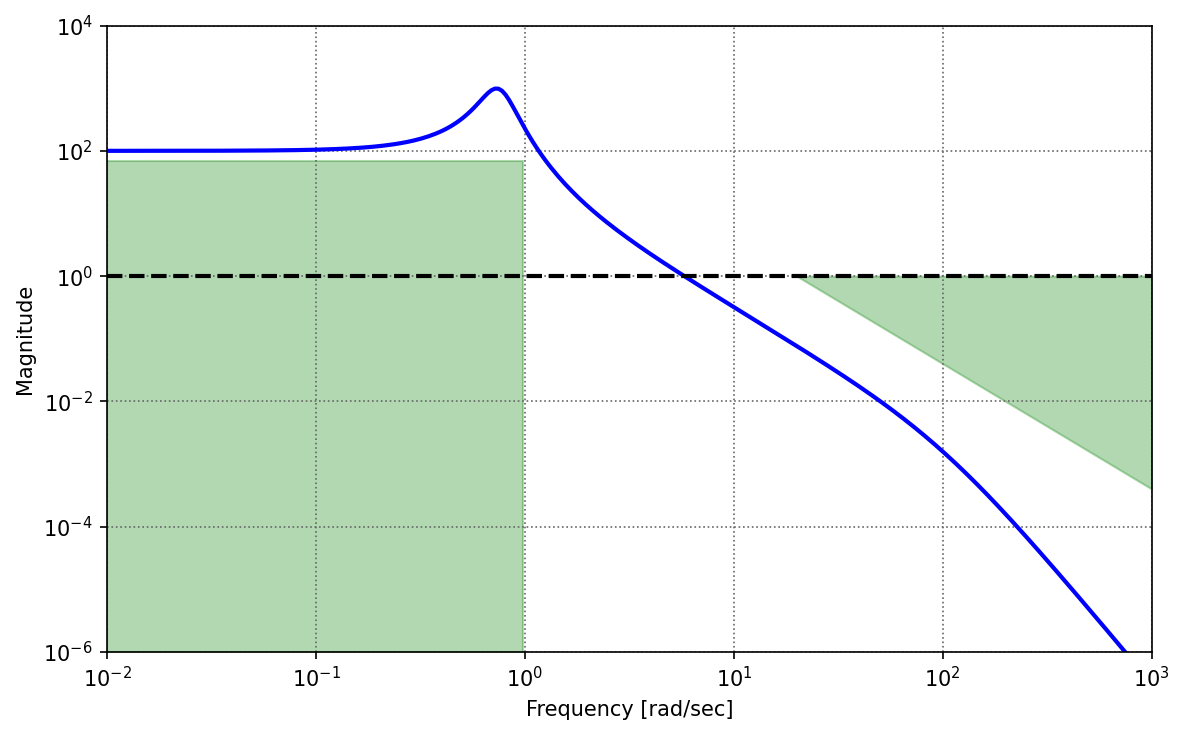

In [2]:
w = logspace(-2,3,300)
#zero
wn = .75
w_low = 1 
w_high = 20 
G1 = 100*tf([1/1,1],[1/100,1])**2*tf([wn**2],[1,2*.2*wn,wn**2])**2 
G1f = G1(complex(0,1)*w)
fig, ax = plt.subplots(1,figsize=(8, 5),dpi=150)
ax.loglog(w,np.abs(G1f),'b-',label='G')
ax.plot([1e-2,1e3],[1,1],color='k',ls='--')
ax.set_ylim([1e-6,1e4])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Frequency [rad/sec]")
plt.fill_between(w[w < w_low], 70, y2=1e-6, color='green', alpha=0.3)
plt.fill_between(w[w > w_high], 1, y2 = (w_high/w[w > w_high])**2, color='green', alpha=0.3)
nicegrid(ax)
savefig('./figs/L17_perf.pdf',dpi=600)
plt.show()